In [1]:
import importlib
# import argparse
import os
import sys
# import time
# import wandb

import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch import optim
# from torch.optim import lr_scheduler
# from torch.utils.data import DataLoader

import random
import numpy as np
import yaml
# from box import Box
from pprint import pprint
# import wandb
# from tqdm import tqdm
# from datetime import timedelta
# from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

# import matplotlib.pyplot as plt
import numpy as np

# from einops import rearrange, repeat
# from einops.layers.torch import Rearrange

CONFIG_FILENAME = '/home/liranc6/ecg_forecasting/liran_project/mrdiff/src/config_ecg.yml'

assert CONFIG_FILENAME.endswith('.yml')

with open(CONFIG_FILENAME, 'r') as file:
    config = yaml.safe_load(file)

# Add the parent directory to the sys.path
ProjectPath = config['project_path']
sys.path.append(ProjectPath)

import liran_project
# from liran_project.mrdiff.src.parser import parse_args
# from liran_project.utils.util import ecg_signal_difference
from liran_project.mrdiff.exp_main import Exp_Main
from liran_project.utils.common import *

# Add the directory containing the exp module to the sys.path
exp_module_path = os.path.join(ProjectPath, 'mrDiff')
sys.path.append(exp_module_path)

import mrDiff.models_diffusion.DDPM
# from mrDiff.exp.exp_main import Exp_Main
# from mrDiff.data_process.etth_dataloader import Dataset_ETT_hour, Dataset_ETT_minute, Dataset_Custom, Dataset_Wind, Dataset_Caiso, Dataset_Production, Dataset_Caiso_M, Dataset_Production_M
# from mrDiff.data_process.financial_dataloader import DatasetH
# from mrDiff.data_process.forecast_dataloader import ForecastDataset
# from mrDiff.exp.exp_basic import Exp_Basic
# from mrDiff.models_diffusion import DDPM
# from mrDiff.utils.tools import EarlyStopping, adjust_learning_rate, visual
# from mrDiff.utils.metrics import metric

from liran_project.mrdiff.src.parser import Args

In [2]:
args = Args(CONFIG_FILENAME)

# Now you can use args as needed
args.to_dict()

{'project_path': '/home/liranc6/ecg_forecasting',
 'tqdm': 'terminal',
 'print_tqdm': False,
 'debug': False,
 'pytorch_lightning': {'strategy': 'DDP'},
 'emd': {'use_emd': False, 'num_sifts': 4, 'max_iter': 1000, 'tol': 1e-06},
 'resume_exp': {'resume': False,
  'resume_from': 9,
  'resume_optimizer': True,
  'resume_epoch': 9,
  'resume_metrics': True,
  'resume_scheduler': True,
  'resume_configuration': False,
  'specific_chpt_path': '/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/mrDiff/DDPM_icentia11k_ftS_sl105000_ll7500_pl7500_lr0.001_bs16_invFalse_itr0/21_10_2024_1424/logs/1_last_checkpoint.pth',
  'was_resumed': False,
  'model_start_training_time': 'None'},
 'wandb': {'entity': 'liranc6',
  'mode': 'online',
  'project': 'mrdiff',
  'resume': 'None',
  'run_name': 'None',
  'id': 'None',
  'save_code': False,
  'resume_from': 'None'},
 'general': {'random_seed': 42,
  'evaluate': False,
  'tag': None,
  'dataset': 'icentia11k',
  'features': 'S',
  'training_m

In [3]:
# exp = Exp_Main(args)
# exp.args.to_dict()

In [4]:
# results_path = \
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/mrDiff/DDPM_icentia11k_ftS_sl70000_ll7500_pl7500_lr0.001_bs16_invTrue_itr0/01_11_2024_1719/best_checkp_dtw_dist.pth"

In [5]:
# assert os.path.exists(results_path)

In [6]:
# exp.args.resume_exp

In [7]:
# # Reload the module
# importlib.reload(liran_project.mrdiff.exp_main)

# # Assuming `exp` is an existing instance of `Exp_Main`
# exp.__class__ = liran_project.mrdiff.exp_main.Exp_Main

# torch.cuda.empty_cache()
# ! gpustat

In [8]:
# import torch
# import sys

# def measure_memory_usage(instance):
#     memory_usage = {}
#     for attr_name in dir(instance):
#         if not attr_name.startswith('__') and not callable(getattr(instance, attr_name)):
#             attr = getattr(instance, attr_name)
#             # Measure memory usage of the attribute in bytes
#             size_in_bytes = sys.getsizeof(attr)
#             print(f"Attribute: {attr_name}, Size in bytes: {size_in_bytes}")
#             memory_usage[attr_name] = size_in_bytes / (1024 ** 2)
#             if isinstance(attr, torch.Tensor):
#                 # Measure additional GPU memory usage for tensors
#                 memory_before = torch.cuda.memory_reserved()
#                 attr_gpu = attr.to('cuda')
#                 memory_after = torch.cuda.memory_reserved()
#                 gpu_memory_usage = memory_after - memory_before
#                 print(f"Attribute: {attr_name}, GPU Memory in bytes: {gpu_memory_usage}")
#                 memory_usage[attr_name] += gpu_memory_usage / (1024 ** 2)
#                 attr_gpu.to('cpu')
#     return memory_usage

# # Measure memory usage of each attribute
# memory_usage = measure_memory_usage(exp)
# print(memory_usage)

In [9]:
# resume_configs = exp.args.resume_exp
# resume_configs['resume'] = True
# resume_configs['resume_configuration'] = False
# resume_configs['resume_optimizer'] = False
# resume_configs['resume_scheduler'] = False
# resume_configs['resume_metrics'] = False
# resume_configs['specific_chpt_path'] = results_path

# exp.args.update_config_from_dict(resume_configs)


In [10]:
# iteration = exp.load_checkpoint(results_path)
# iteration

In [11]:
# exp.args.testing.patients.end_patient = 1

In [12]:
# # Convert Box object to dictionary
# config_dict = exp.args.configs

# # Access the configuration values using dictionary syntax
# random_seed = config_dict['general']['random_seed']
# tag = config_dict['general']['tag']
# dataset = config_dict['general']['dataset']
# features = config_dict['general']['features']

# learning_rate = config_dict['optimization']['learning_rate']
# batch_size = config_dict['optimization']['batch_size']

# context_len = config_dict['training']['sequence']['context_len']
# label_len = config_dict['training']['sequence']['label_len']
# model = config_dict['training']['model_info']['model']
# pred_len = config_dict['training']['sequence']['pred_len']
# iterations = config_dict['training']['iterations']['itr']

# inverse = config_dict['data']['inverse']

# setting = f"{model}_{dataset}_ft{features}_sl{context_len}_ll{label_len}_pl{pred_len}_lr{learning_rate}_bs{batch_size}_inv{inverse}_itr{iterations}"
# setting

In [13]:
# fix_seed = random_seed
# random.seed(fix_seed)
# torch.manual_seed(fix_seed)
# np.random.seed(fix_seed)

In [14]:
# exp.datasets, exp.dataloaders = {}, {}
# exp.args.testing.patients.end_patient = 1

In [15]:
# # Reload the module
# importlib.reload(liran_project.mrdiff.exp_main)
# import mrDiff.utils.tools
# importlib.reload(mrDiff.utils.tools)

# # Assuming `exp` is an existing instance of `Exp_Main`
# exp.__class__ = liran_project.mrdiff.exp_main.Exp_Main

# torch.cuda.empty_cache()
# ! gpustat

# exp.test(setting=setting,
#          time_path='01_11_2024_1719',
#          test = True,
#          visualize = True,
#          chpt_path=results_path
#          )

In [16]:
import yaml
import sys
# import subprocess
# import pytorch_lightning as pl
# from pytorch_lightning.loggers import WandbLogger
# from pytorch_lightning import Trainer
# from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping  #, ModelSummary
# from pytorch_lightning.strategies import DDPStrategy, FSDPStrategy
# from pytorch_lightning.utilities.rank_zero import rank_zero_only
from torch.utils.data import DataLoader

CONFIG_FILENAME = '/home/liranc6/ecg_forecasting/liran_project/mrdiff/src/config_ecg.yml'

assert CONFIG_FILENAME.endswith('.yml')

with open(CONFIG_FILENAME, 'r') as file:
    config = yaml.safe_load(file)

# Add the parent directory to the sys.path
ProjectPath = config['project_path']
sys.path.append(ProjectPath)

from liran_project.mrdiff.src.parser import parse_args
# from liran_project.utils.util import Debbuger
from liran_project.utils.dataset_loader import SingleLeadECGDatasetCrops_mrDiff
import liran_project.utils.dataset_loader as dataset_loader
from liran_project.mrdiff.exp_main import Exp_Main, ExpMainLightning
from liran_project.utils.common import *
from pytorch_lightning import LightningModule

# Add the directory containing the exp module to the sys.path
exp_module_path = os.path.join(ProjectPath, 'mrDiff')
sys.path.append(exp_module_path)

In [22]:
# split the windows to fixed size context and label windows
context_window_size = args.training.sequence.label_len # minutes * seconds * fs
label_window_size = args.training.sequence.pred_len  # minutes * seconds * fs
window_size = context_window_size+label_window_size
filename = args.paths.train_data
noramlize_method = 'z_score'
dataset = dataset_loader.SingleLeadECGDatasetCrops_mrDiff(context_window_size, label_window_size, filename, end_patiant=-1, data_with_RR=True, return_with_RR=False, cache_size=30, normalize_method=noramlize_method, norm_statistics_file=args.paths.norm_statistics_file)
print(f"{len(dataset)=}\n"\
        f"{dataset.norm_statistics=}")
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)
for i, batch in enumerate(dataloader):
    if i == 0:
        break
    
# Assuming `batch` is your specific batch of data
batch_x_without_RR, batch_y_withoutRR, _, _ = batch

len(dataset)=19214
dataset.norm_statistics={'mean': array([0.18402337, 0.16456081, 0.10616052, ..., 0.00129965, 0.0015369 ,
       0.00174686]), 'std': array([0.51686144, 0.47889874, 0.3797634 , ..., 0.12651595, 0.12407894,
       0.1223257 ]), 'max': 9.130661183507797, 'min': -179.70862453077794}


In [23]:
# Load the checkpoint file on CPU
exp = ExpMainLightning(args=args)  # Initialize the model

In [25]:
visualize_path = f'/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/{noramlize_method}'
if noramlize_method is not None:
    norm_stat = (f"{noramlize_method}", dataset.norm_statistics)
else:
    norm_stat = (None, None)
checkpoint_path = "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/mrDiff/DDPM_icentia11k_ftS_sl80000_ll7000_pl7000_lr0.001_bs16_invTrue_itr0/12_11_2024_0022/val_loss.ckpt"
output, x, y, finals = exp.forward(x=batch_x_without_RR,
                            checkpoint_path=checkpoint_path,
                            norm_stat=norm_stat,
                            y=batch_y_withoutRR,
                            visual_path=visualize_path,
                            )



/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/0.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/1.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/2.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/3.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/4.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/5.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/6.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/7.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/8.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/9.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/10.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/11.png
/home/liranc6/ecg_forecasting/liran_project/mrdiff/figures/try/z_score/12.

In [26]:
# from liran_project.utils.dataset_loader import normalized, de_normalized
# from mrDiff.utils.tools import EarlyStopping, adjust_learning_rate, visual

# def _fix_input_shape_to_3dim(x):
#         # fix to shape (B, L, 1)
#         if x.dim() == 3: # x.shape = (B, L, 1)
#             pass
#         if x.dim() == 2: # x.shape = (B, L)
#             x = x.unsqueeze(-1)
#         if x.dim() == 1: # x.shape = (L)
#             x = x.unsqueeze(0).unsqueeze(-1)
            
#         return x

# y = batch_y_withoutRR
# visual_path = visualize_path
# folder_path = visual_path
# normalize_method, norm_statistics = norm_stat
# os.makedirs(folder_path, exist_ok=True)
# his = x.squeeze(-1)
# pred = output.squeeze(-1)
# y = _fix_input_shape_to_3dim(y)
# if norm_stat is not None:
#     y = y.squeeze(-1)
#     # y = normalized(y.squeeze(-1), normalize_method, norm_statistics)
#     pass
#     # y = de_normalized(y.squeeze(-1), normalize_method, norm_statistics)
# true = y if y is not None else torch.zeros_like(pred)
# look_back = min(500, his.shape[1])
# for sample in range(pred.shape[0]): # B, L, D
#     history = his[sample, -look_back:].cpu().numpy()
#     gt = true[sample, :].cpu().numpy()
#     pd = pred[sample, :].cpu().numpy()
#     visual(history, gt, pd, os.path.join(folder_path, str(sample) + '.png'), dpi=200)

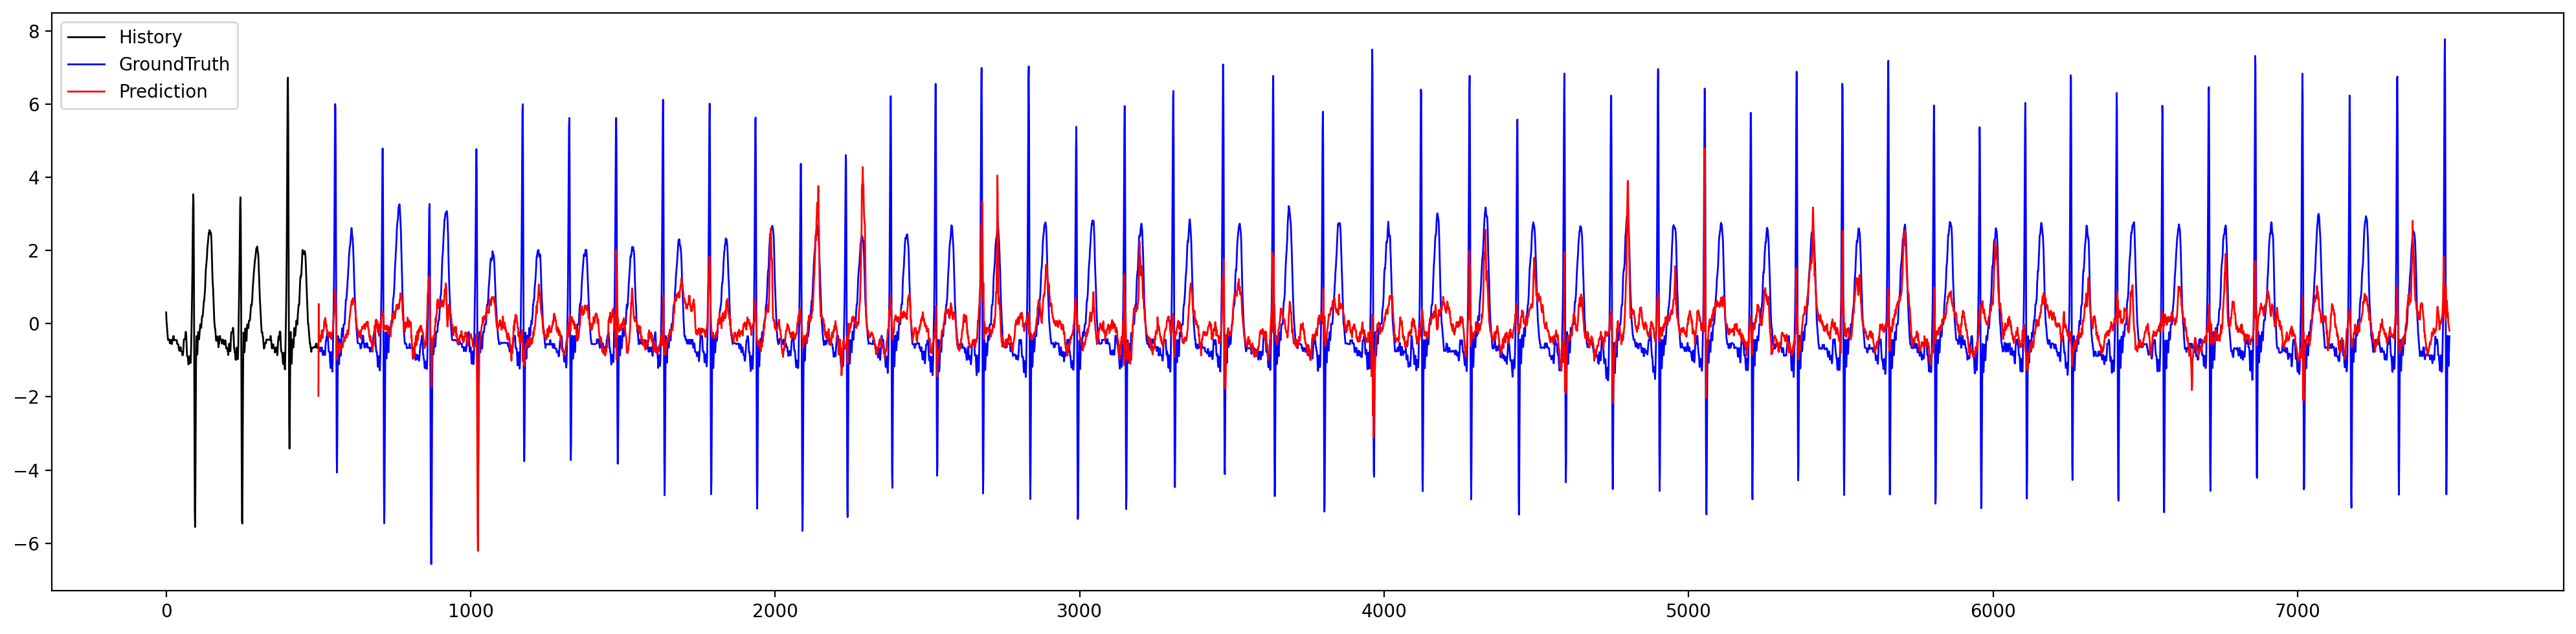

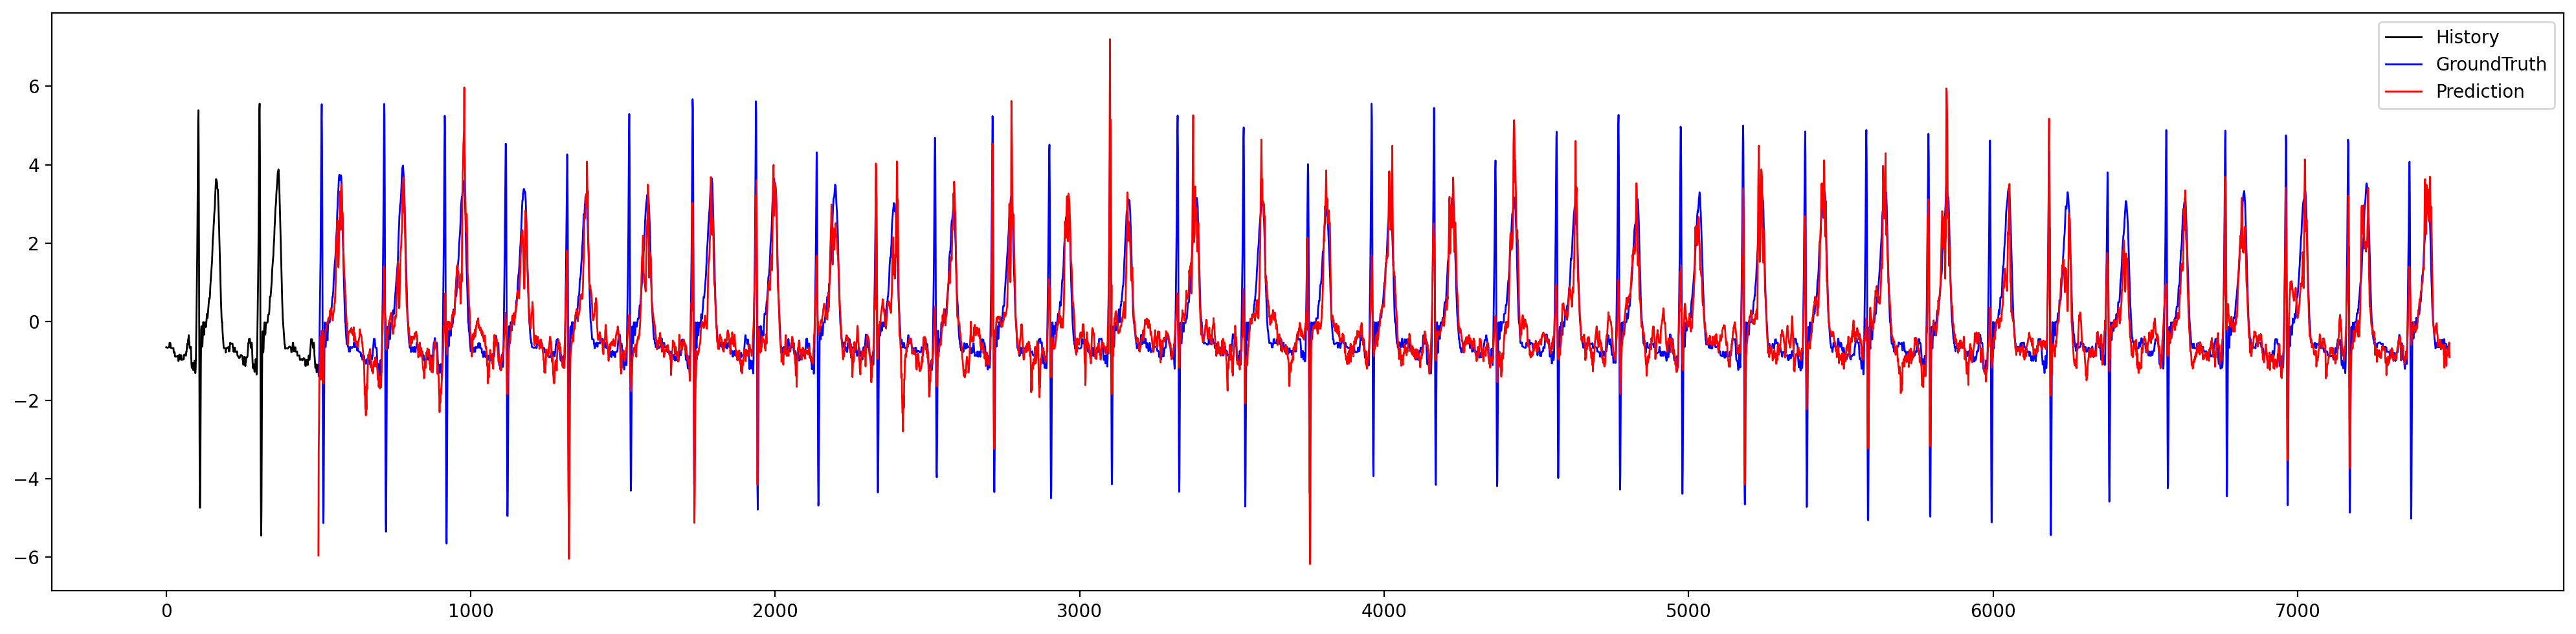

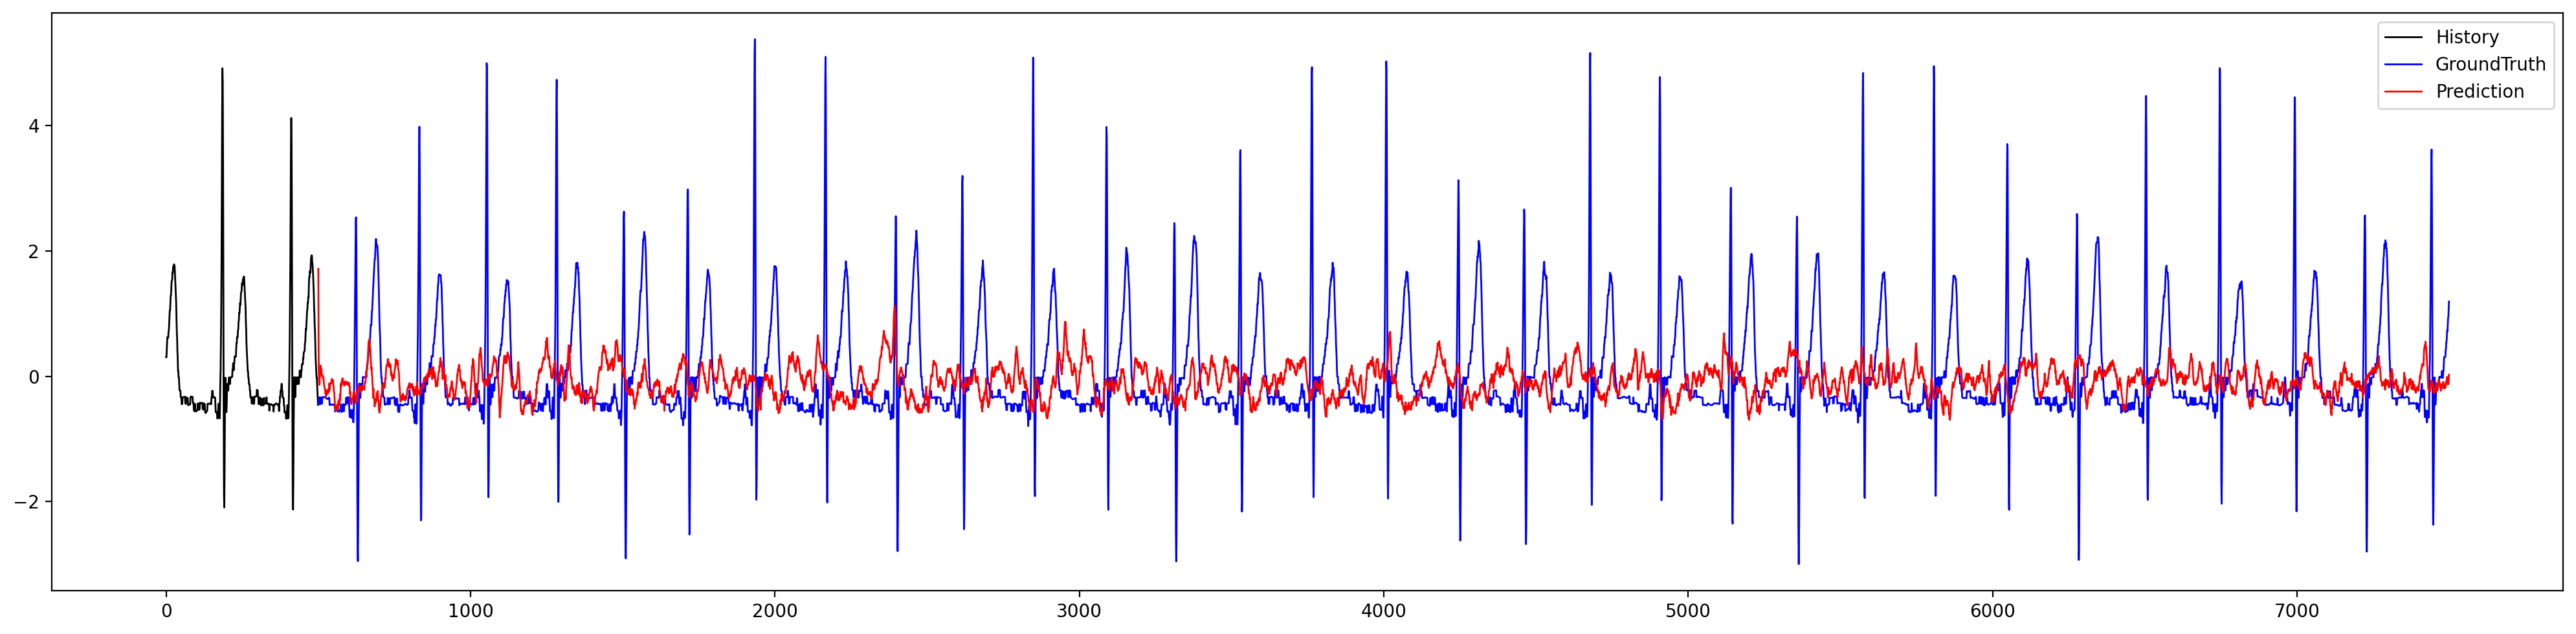

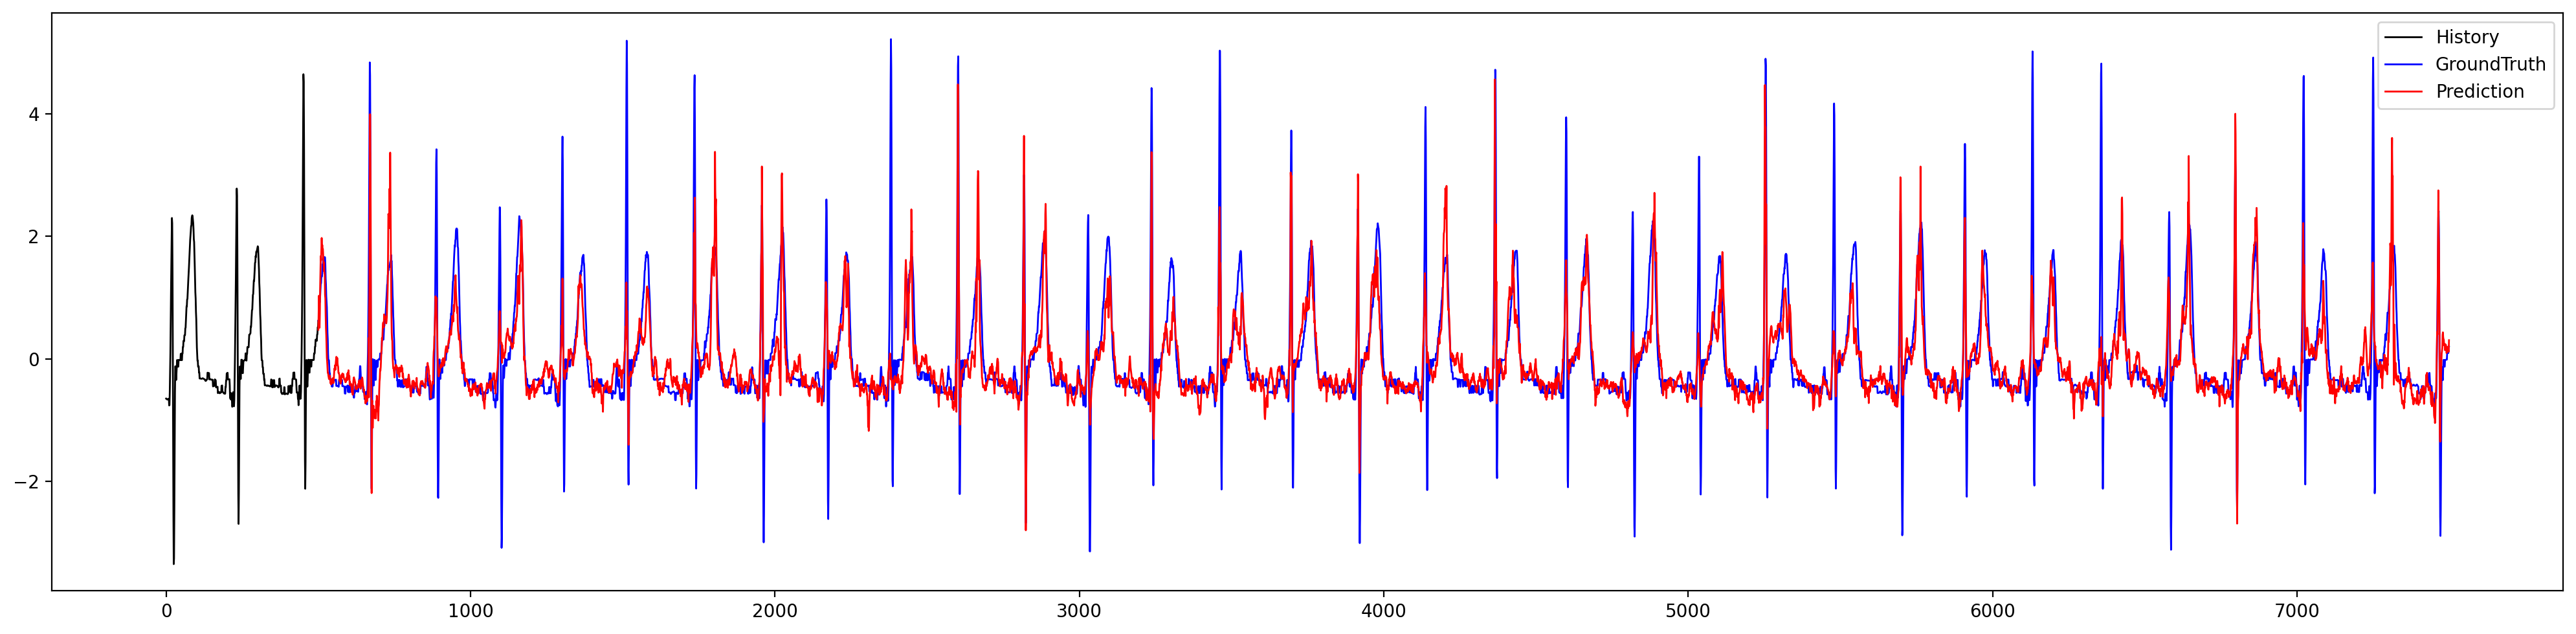

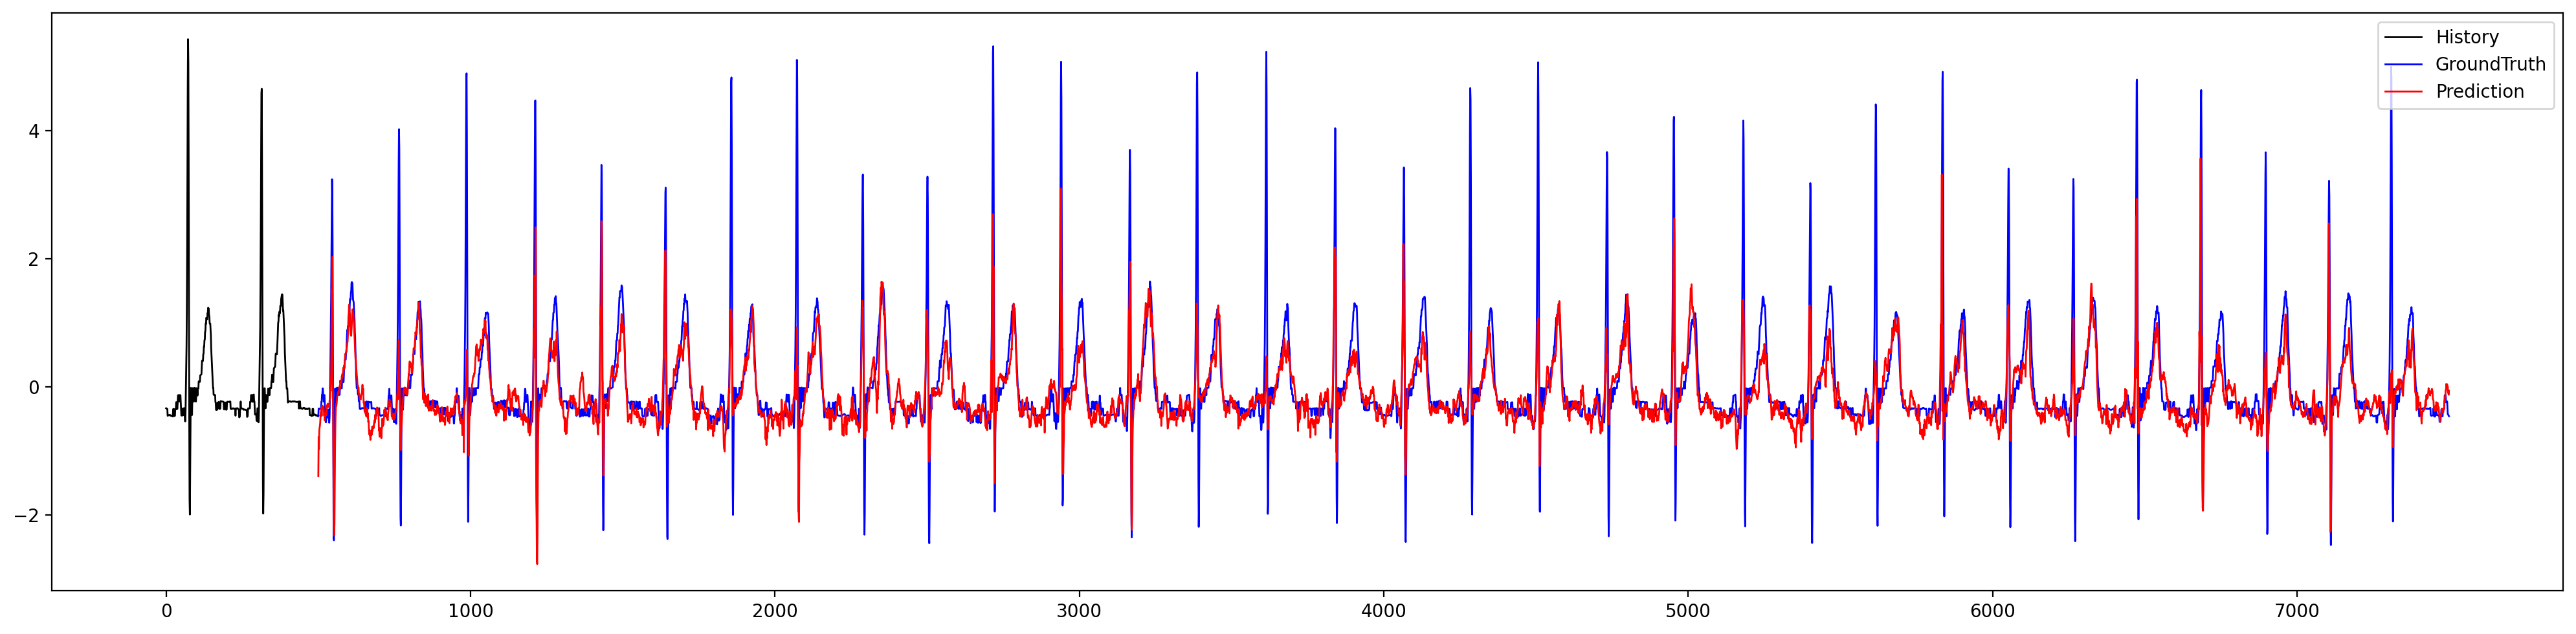

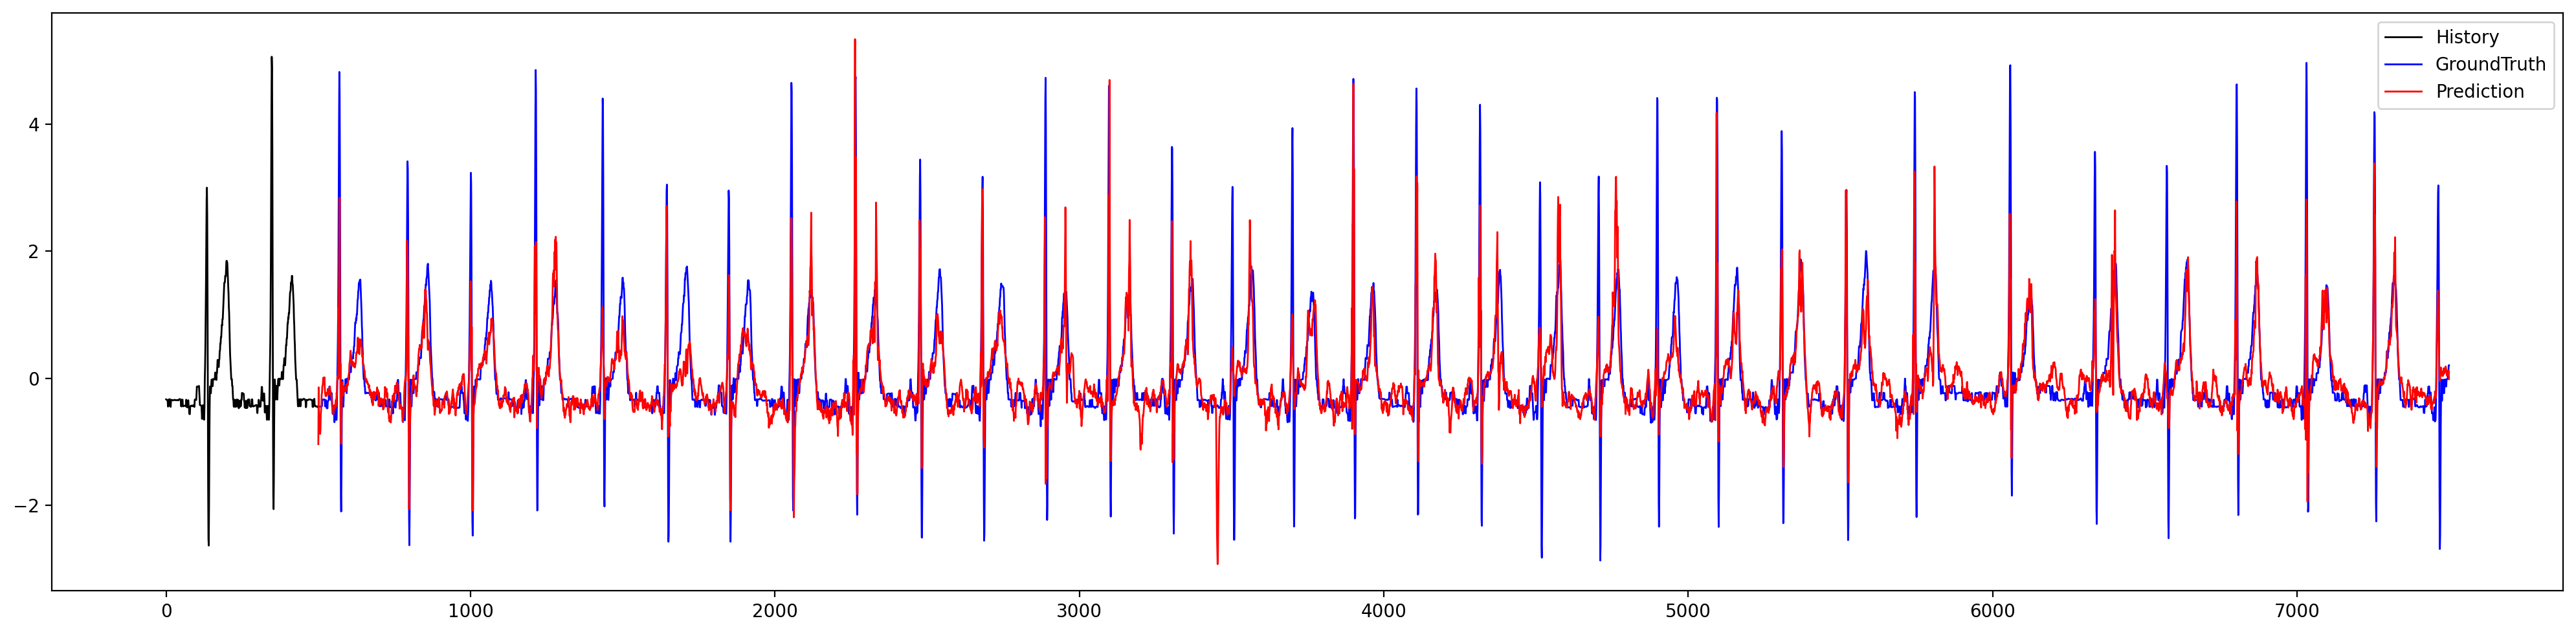

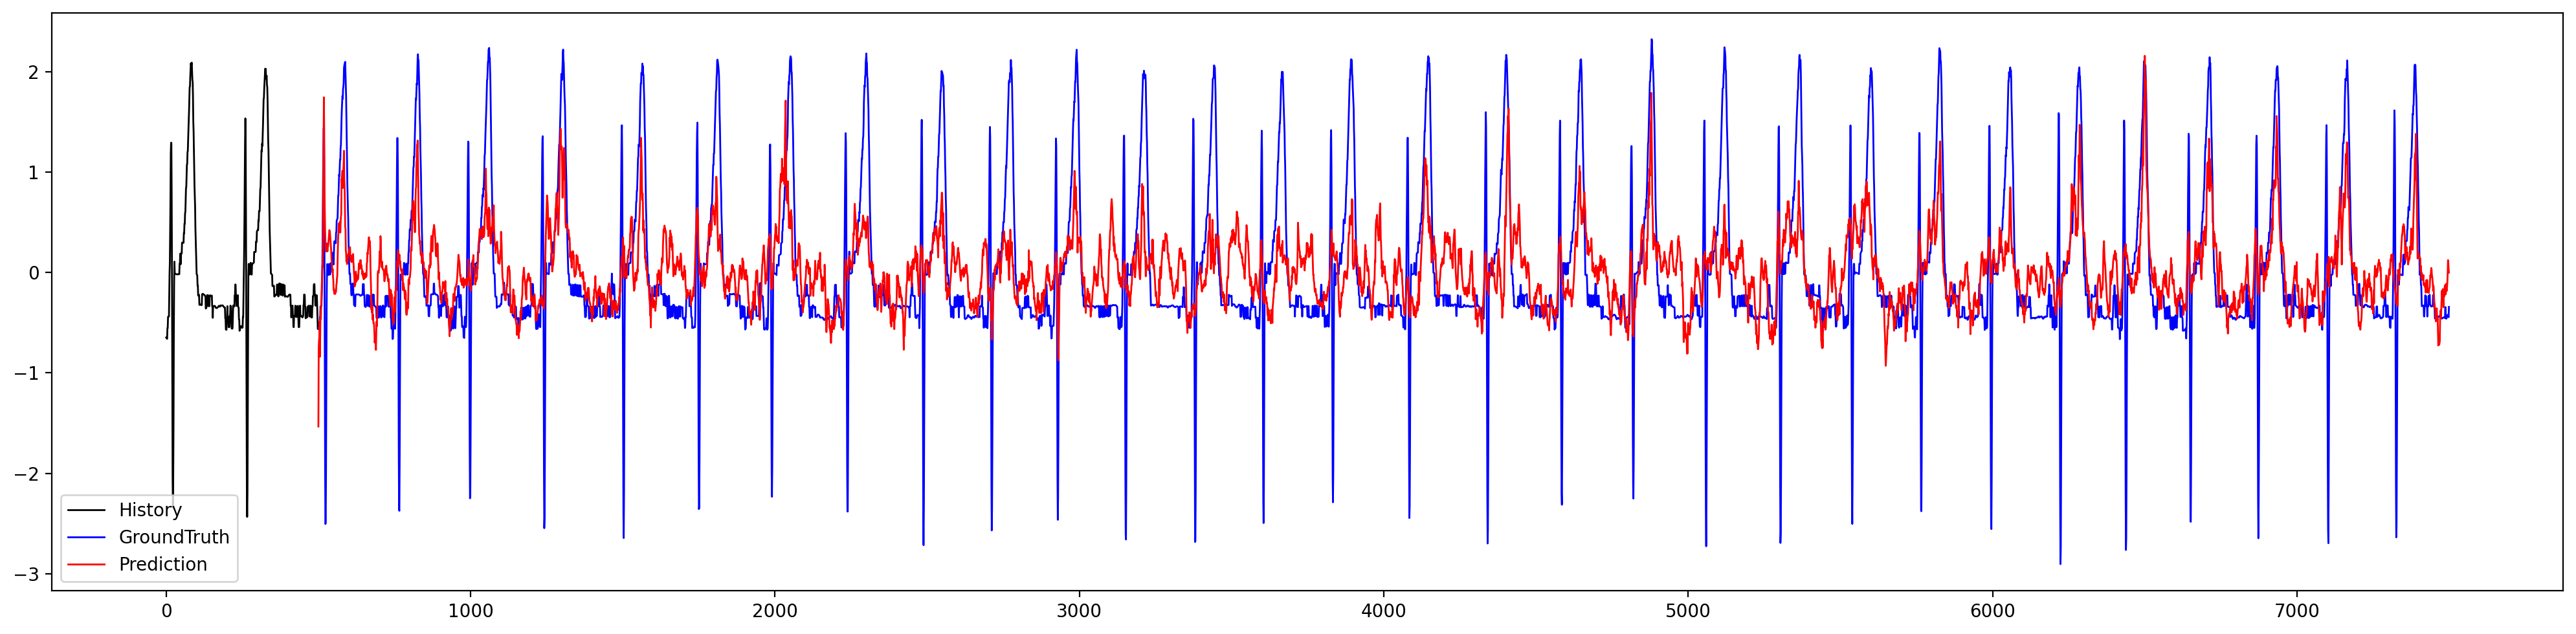

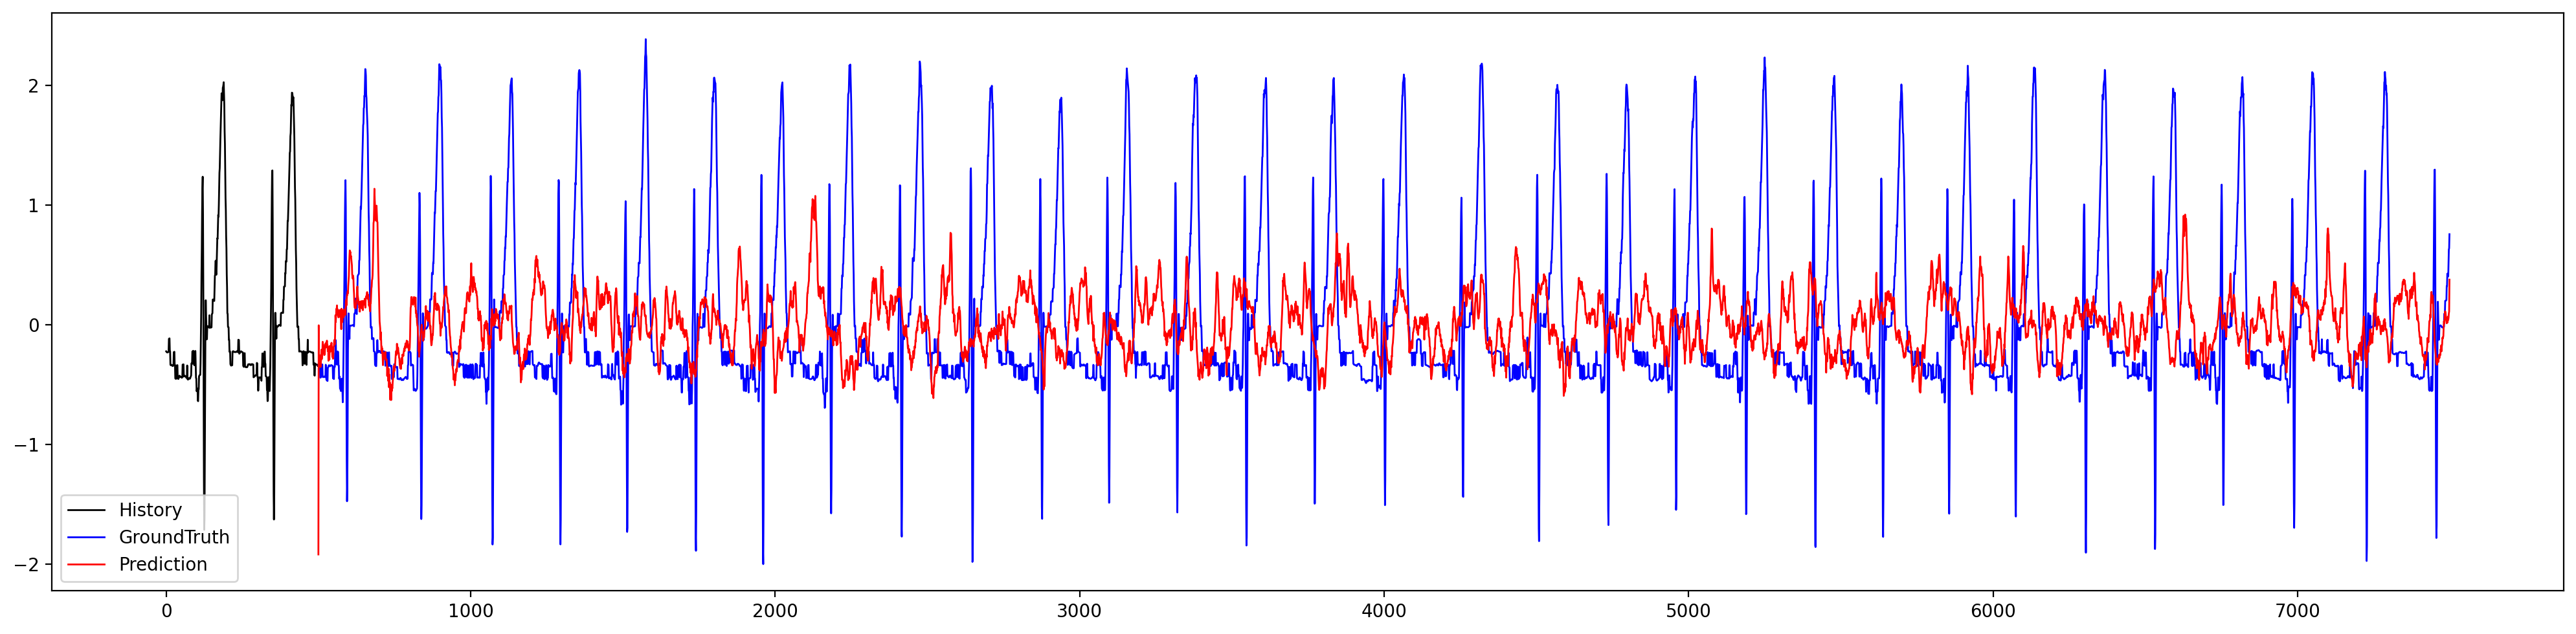

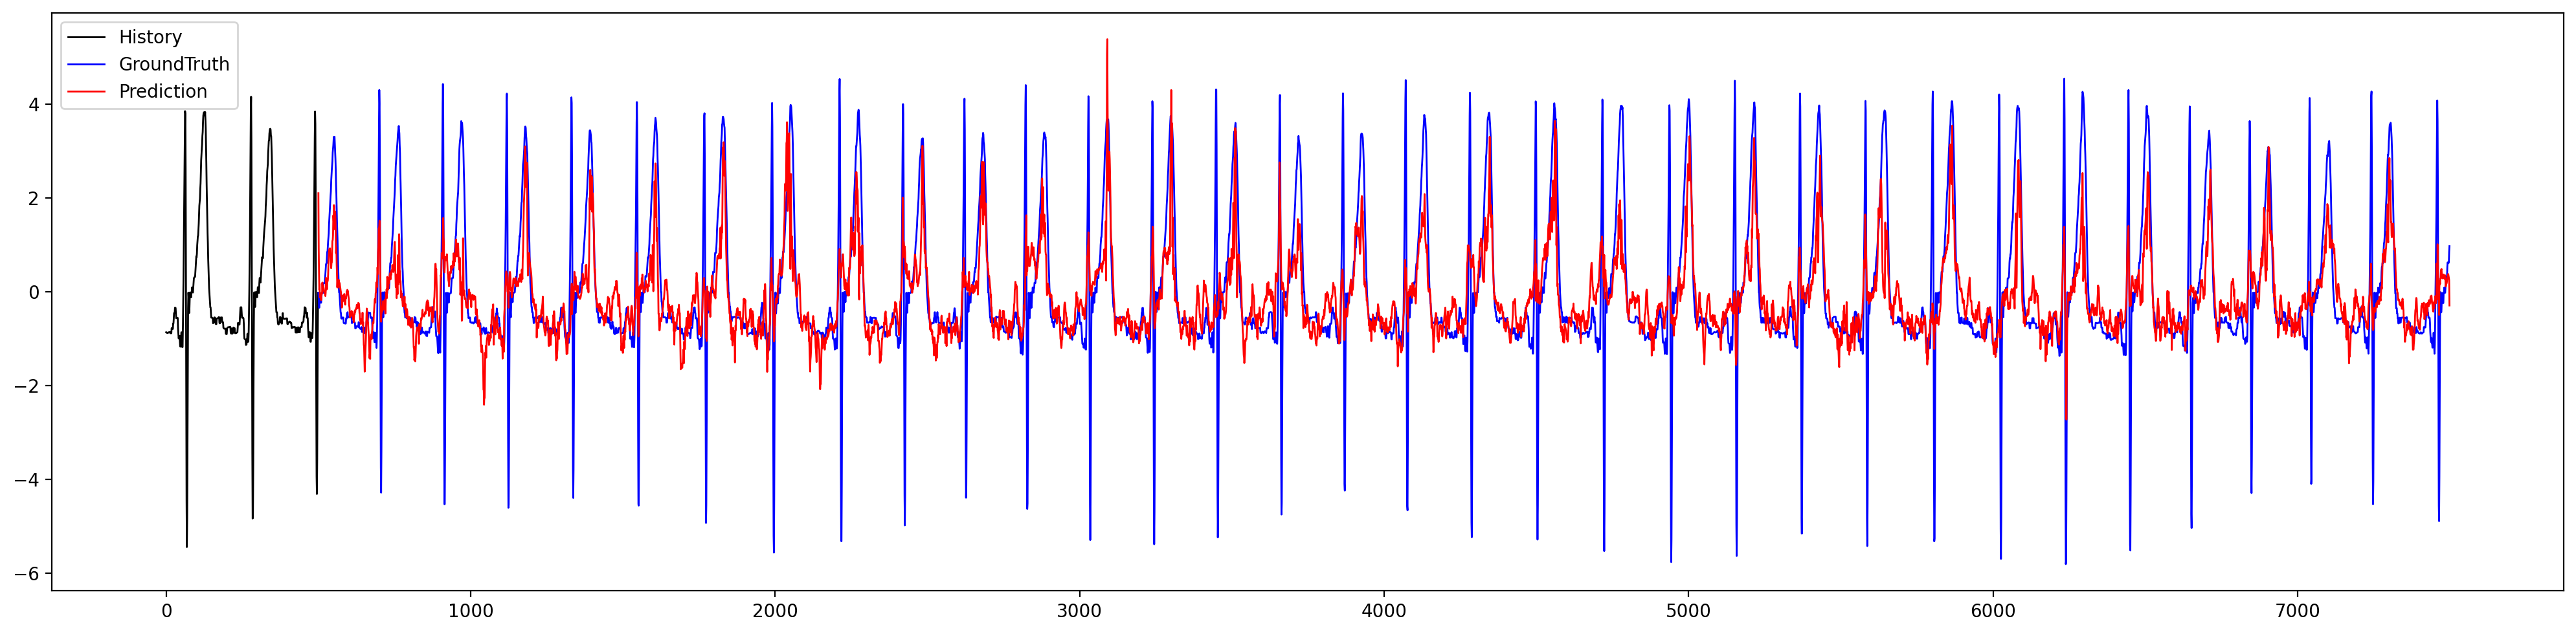

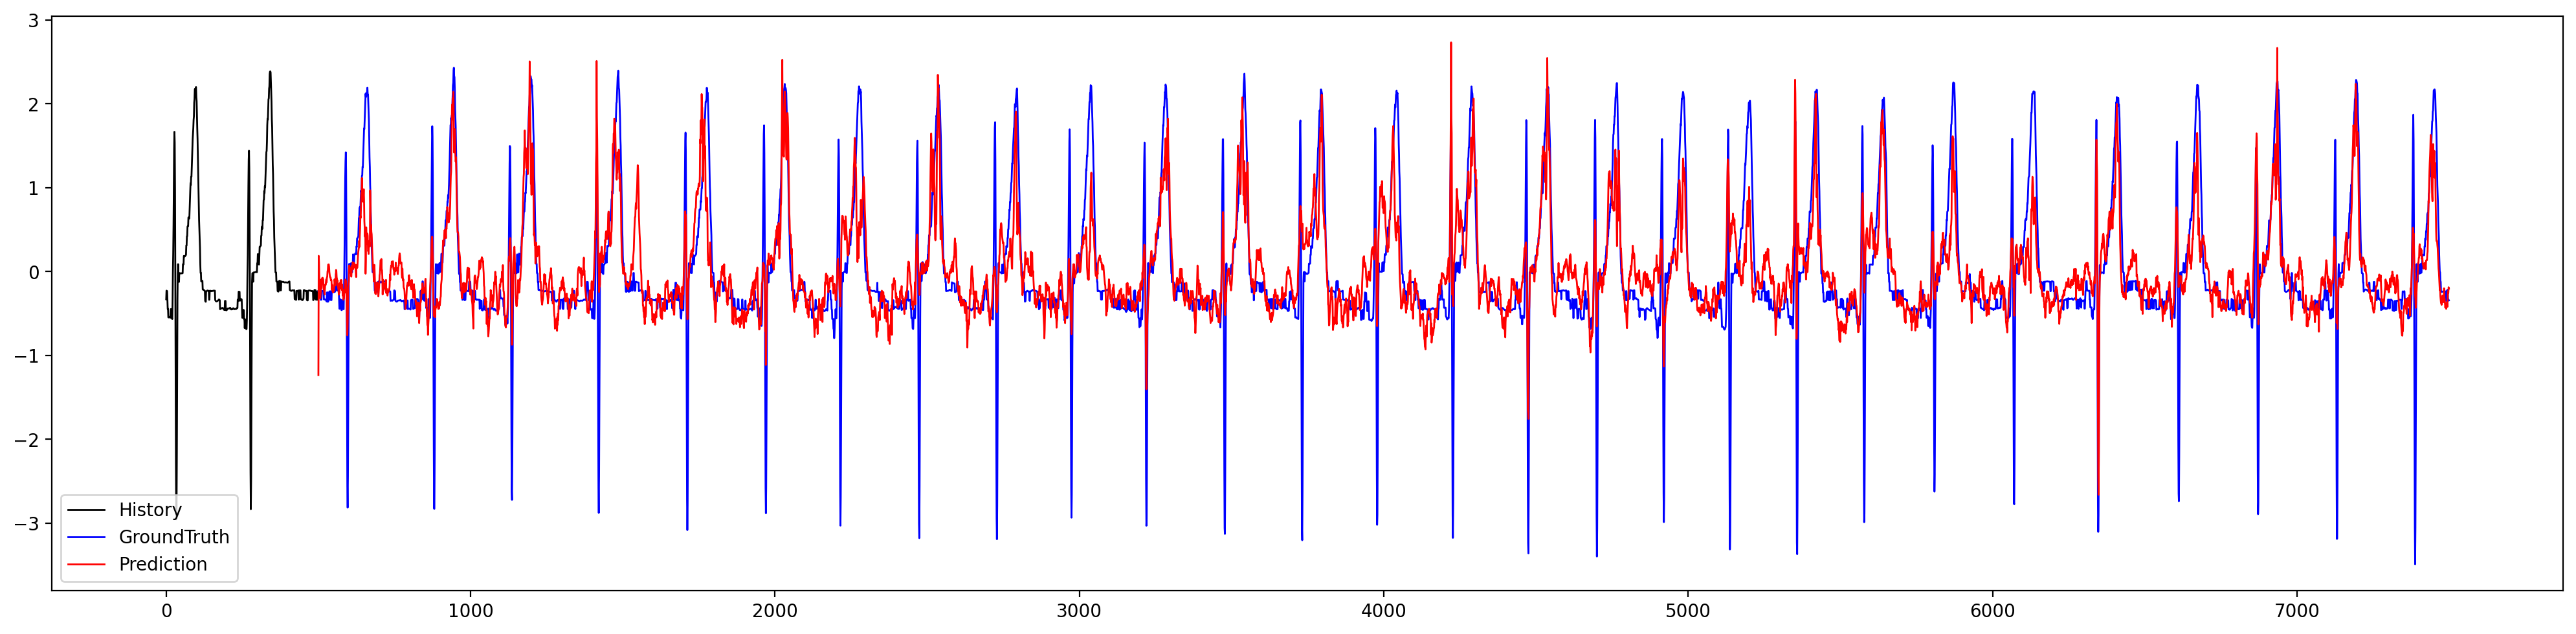

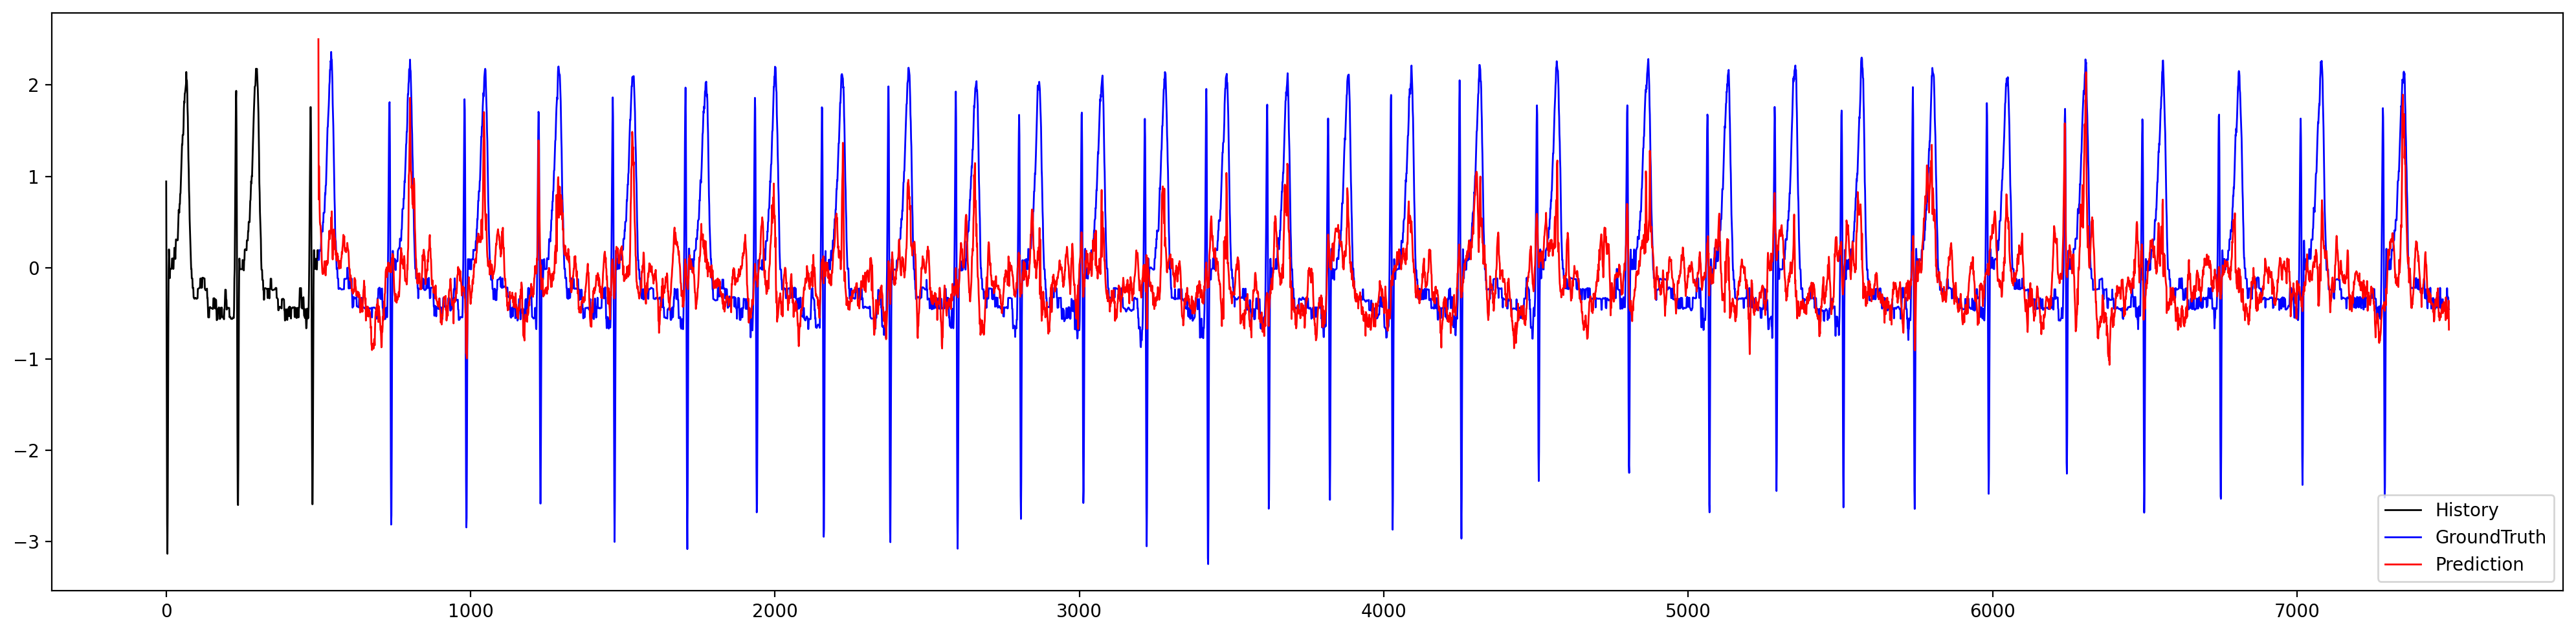

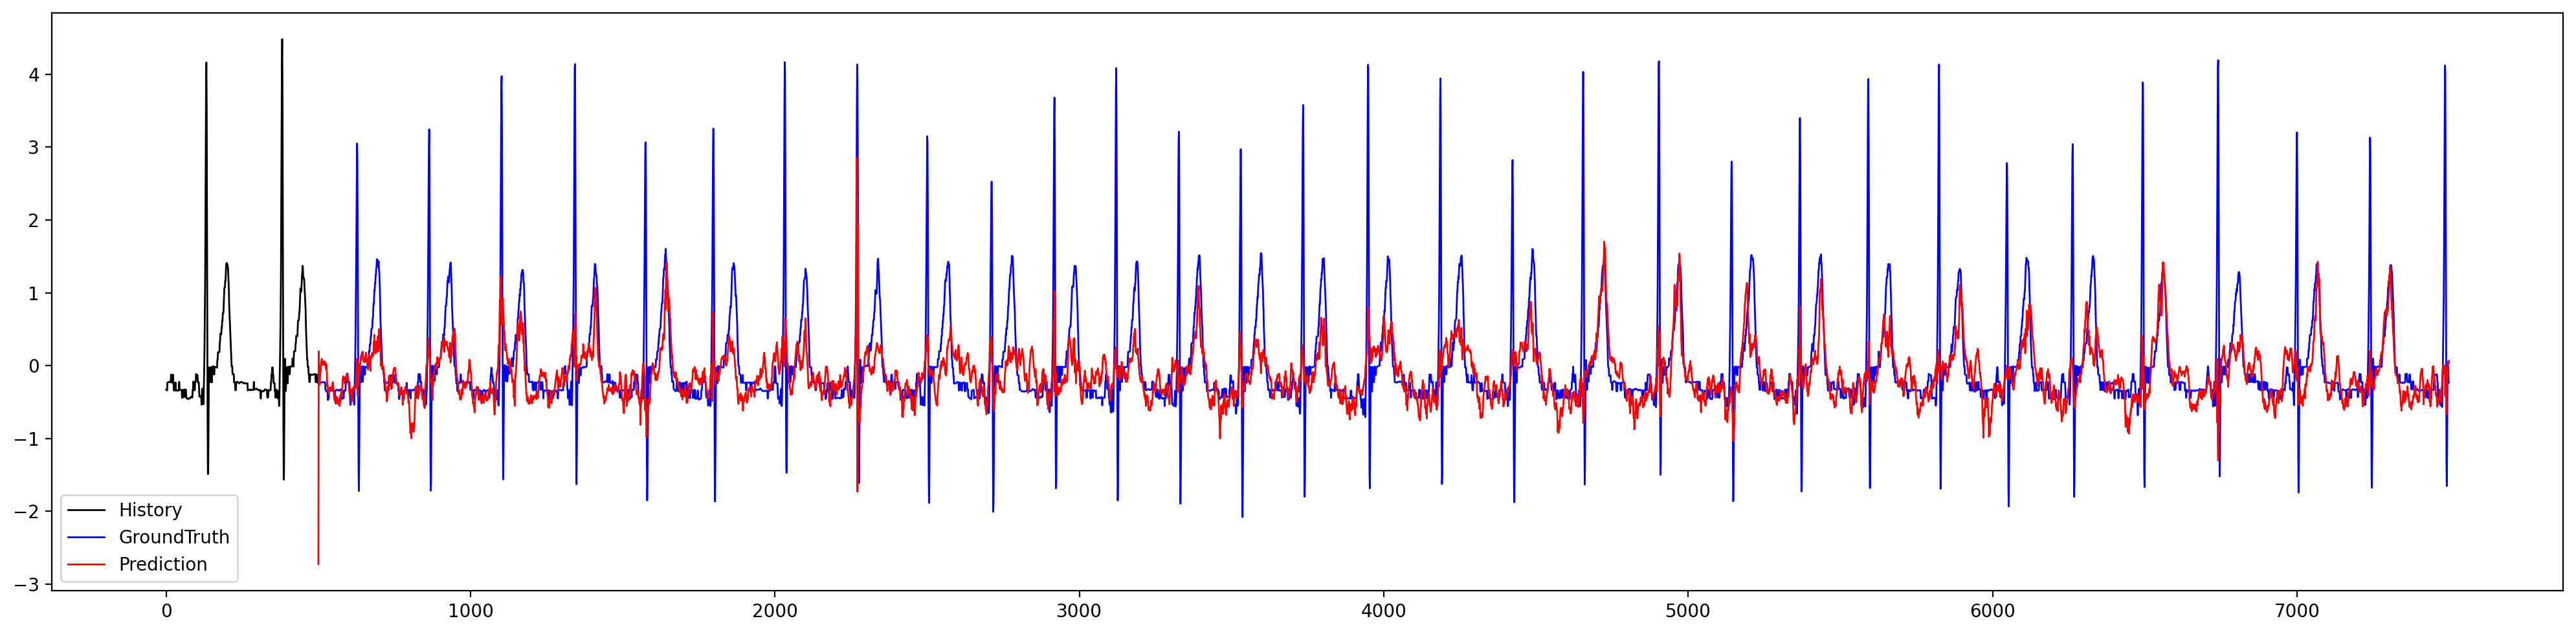

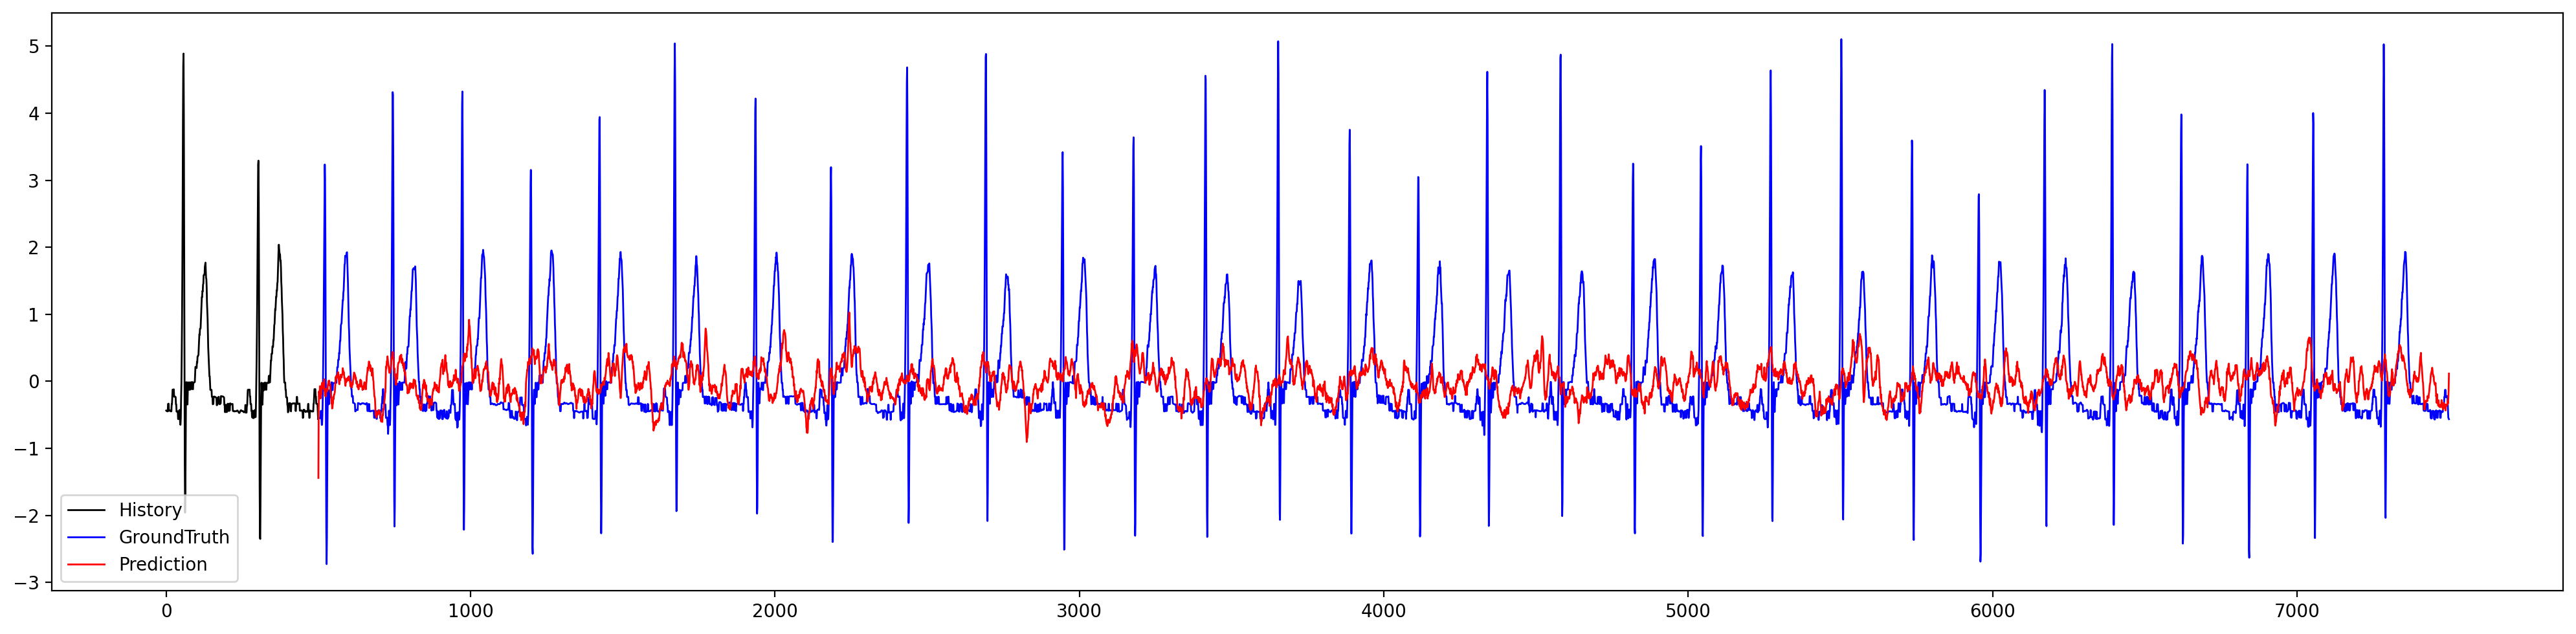

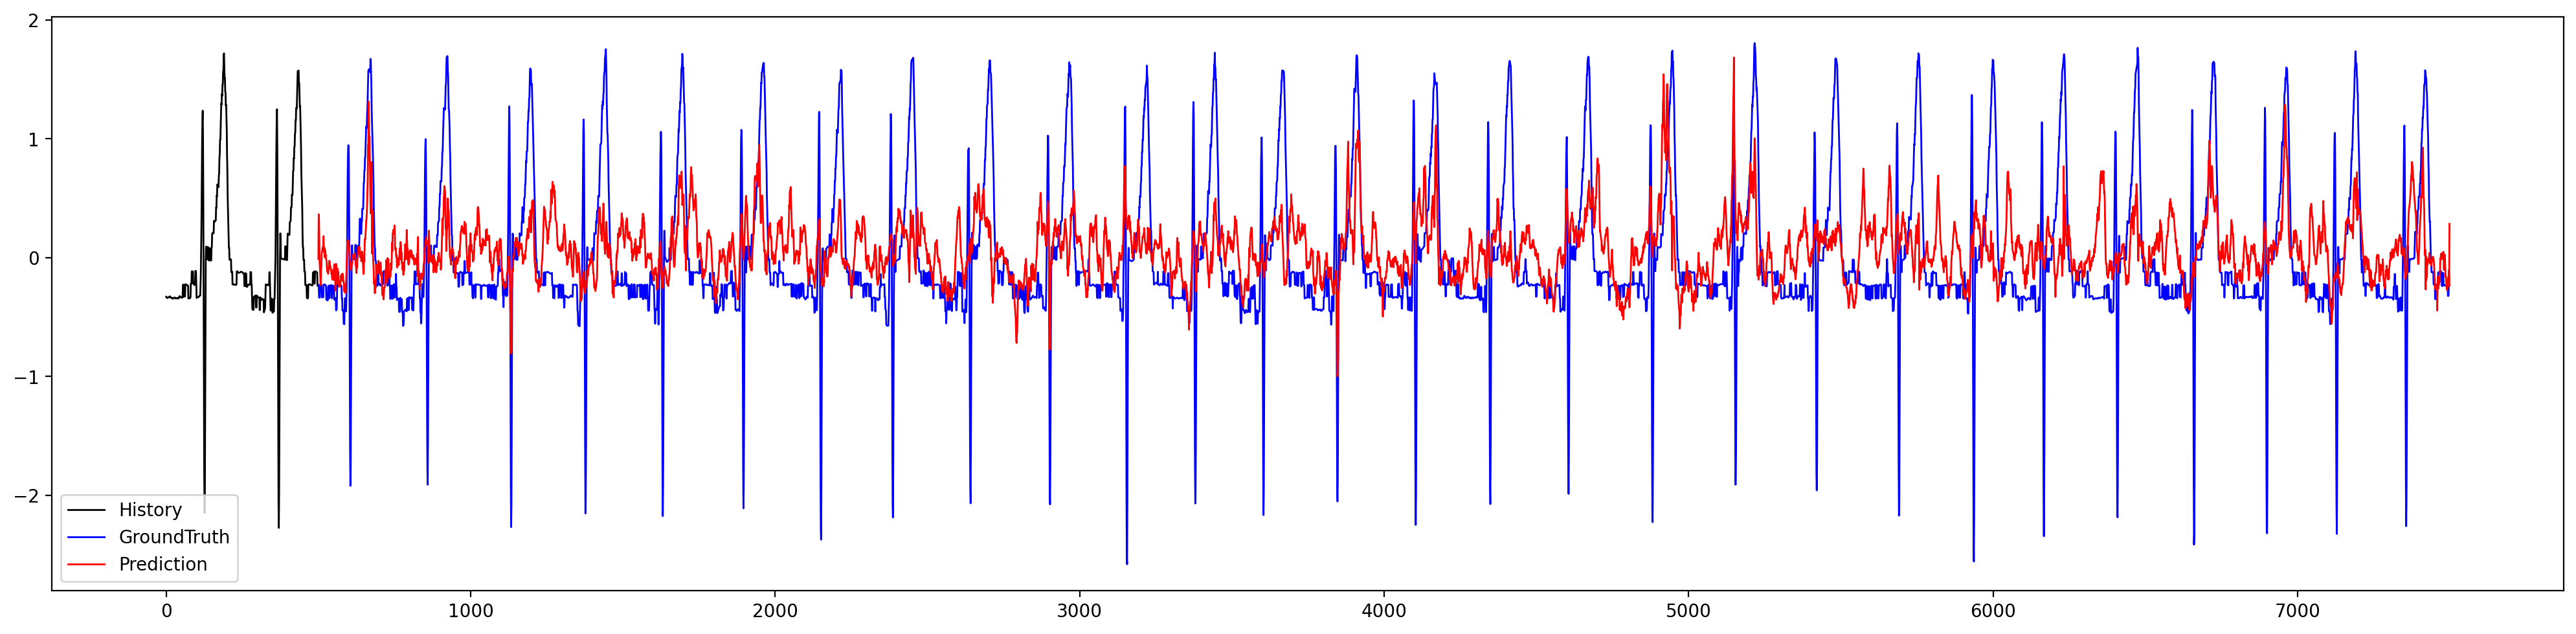

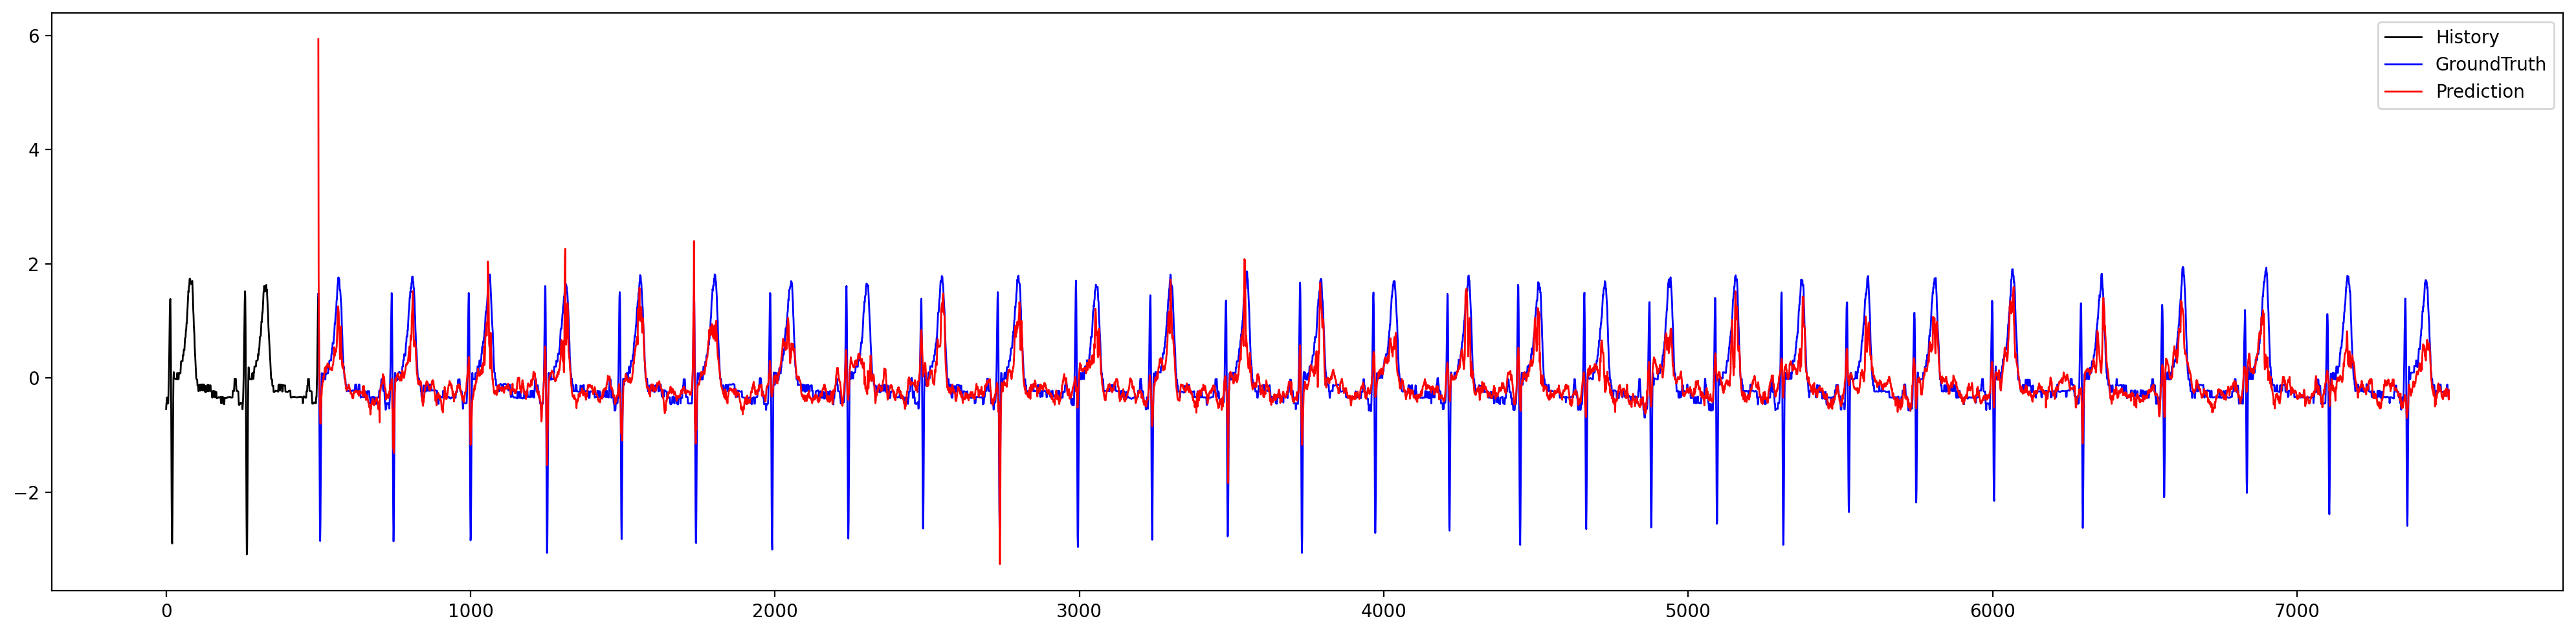

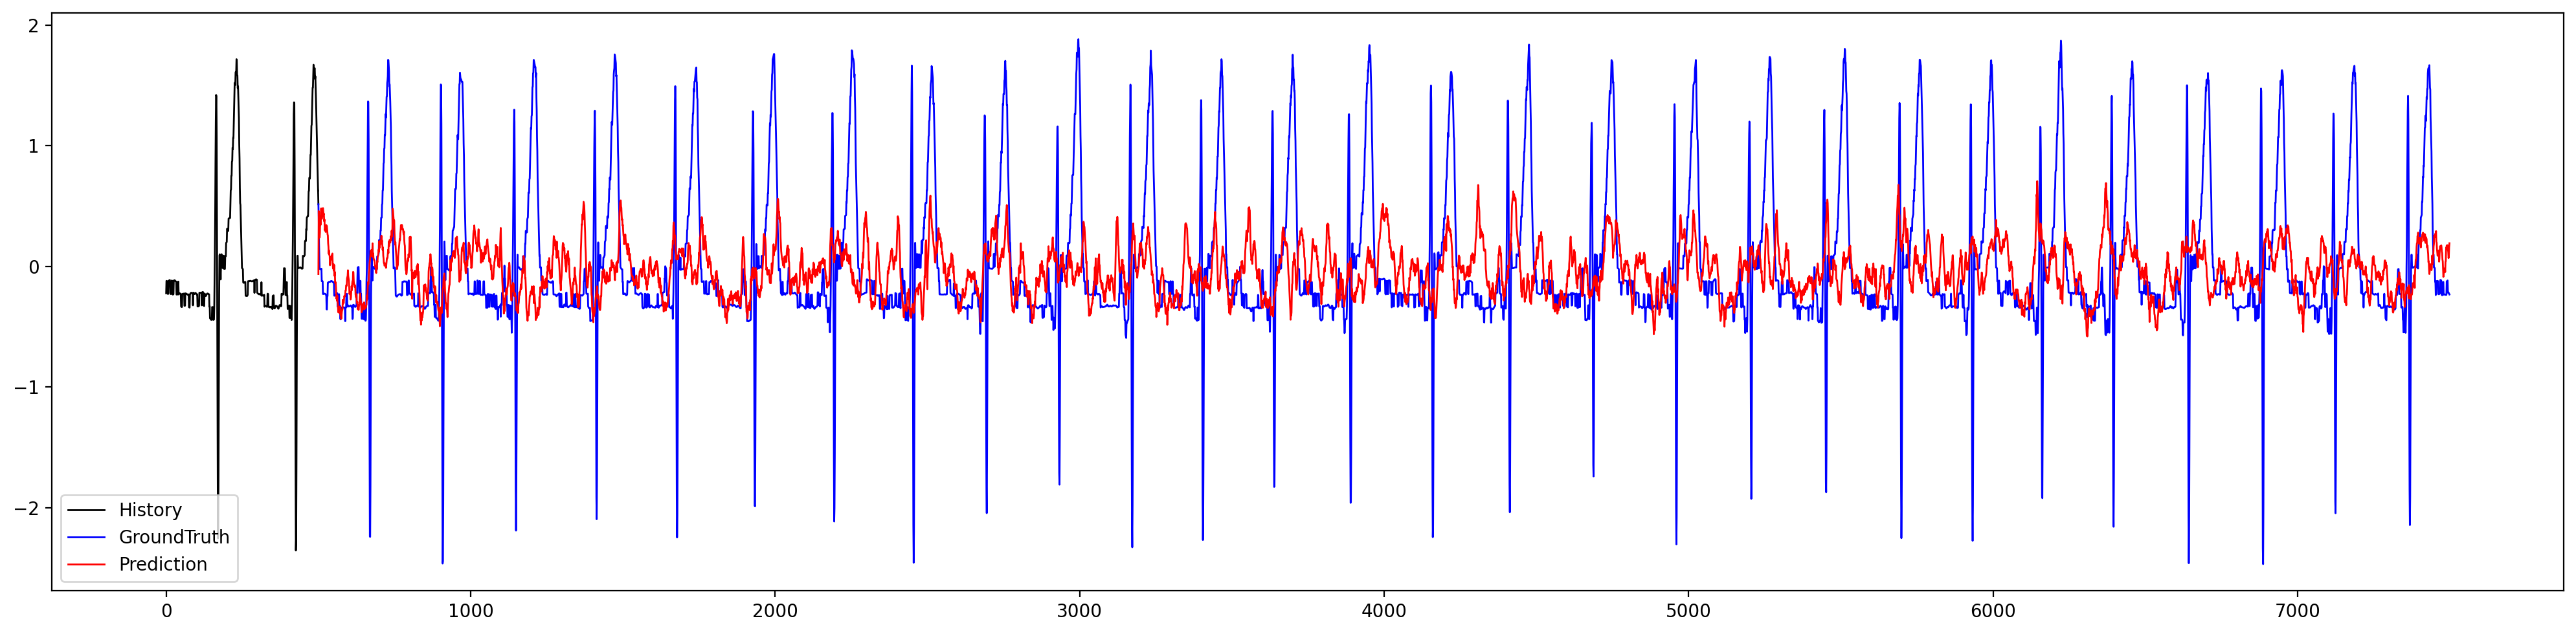

In [27]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image

def display_all_plots(visualize_path):
    # Find all .png files in the visualize_path directory
    png_files = glob.glob(os.path.join(visualize_path, '*.png'))
    
    # Sort the files to display them in order
    png_files.sort()
    
    # Display each .png file inline
    for png_file in png_files:
        display(Image(filename=png_file))

# Example usage
display_all_plots(visualize_path)